In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

In [3]:
data=pd.read_csv("insurance.csv")

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
data.shape

(1338, 7)

In [7]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 1338
Number of Columns 7


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Categorical Features:
       1) Sex
       2) Smoker
       3) Region

In [9]:
# checking for missing values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Data Analysis

In [10]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


C:\Users\Meghana\anaconda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


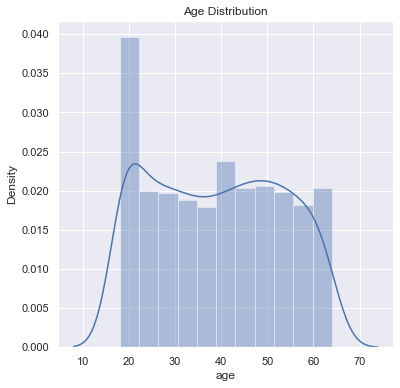

In [11]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(data['age'])
plt.title('Age Distribution')
plt.show()

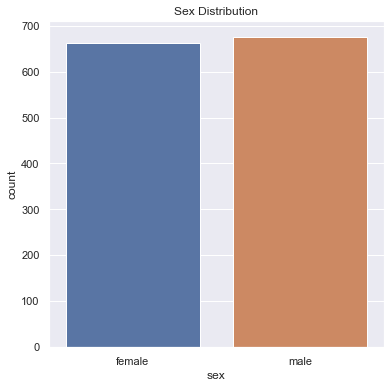

In [12]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=data)
plt.title('Sex Distribution')
plt.show()

In [13]:
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\Meghana\anaconda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


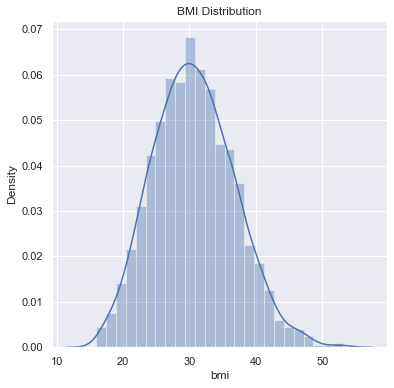

In [14]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(data['bmi'])
plt.title('BMI Distribution')
plt.show()

##### Normal BMI Range --> 18.5 to 24.9

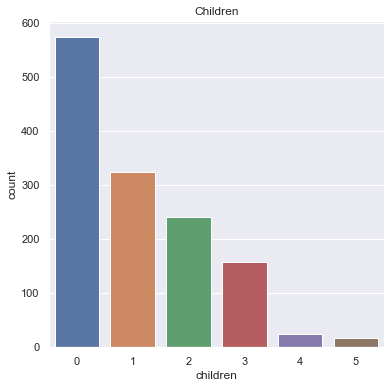

In [15]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=data)
plt.title('Children')
plt.show()

In [16]:
data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

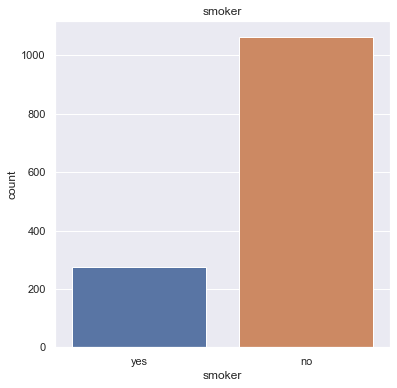

In [17]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=data)
plt.title('smoker')
plt.show()

In [18]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

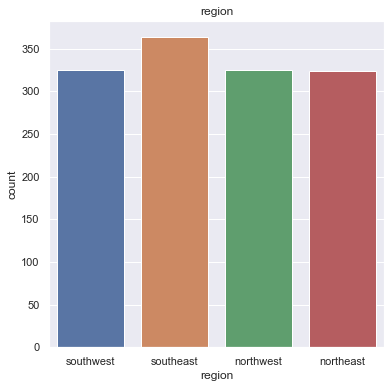

In [19]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=data)
plt.title('region')
plt.show()

In [20]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\Meghana\anaconda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


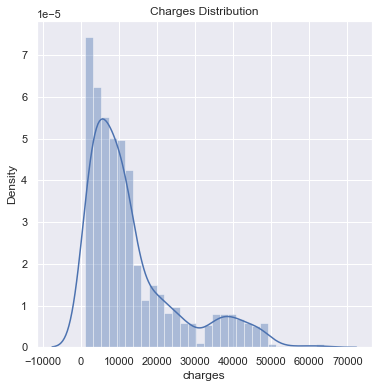

In [21]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(data['charges'])
plt.title('Charges Distribution')
plt.show()

<AxesSubplot:xlabel='bmi', ylabel='charges'>

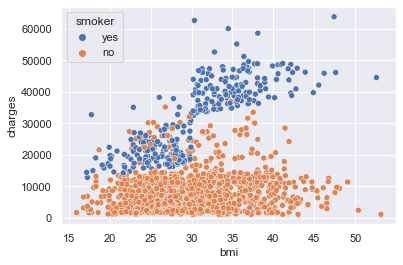

In [22]:
sns.scatterplot(x = 'bmi', y = 'charges', hue = 'smoker', data = data)

<AxesSubplot:xlabel='age', ylabel='charges'>

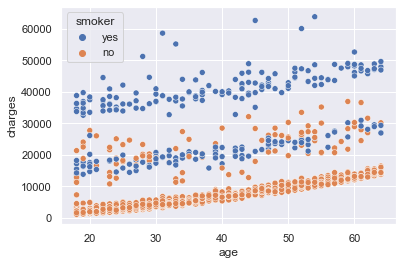

In [23]:
sns.scatterplot(x = 'age', y = 'charges', hue = 'smoker', data = data)

#### Person who smoke have to pay more cost for insurance, obese person who smoke have the highest medical cost.

### Data Pre-Processing

##### Encoding the categorical features

In [24]:
data['sex'].unique()
data['sex']=data['sex'].map({'female':0,'male':1})
data['smoker']=data['smoker'].map({'yes':1,'no':0})
data['region']=data['region'].map({'southwest':1,'southeast':2,
                   'northwest':3,'northeast':4})

### Correlation Analysis

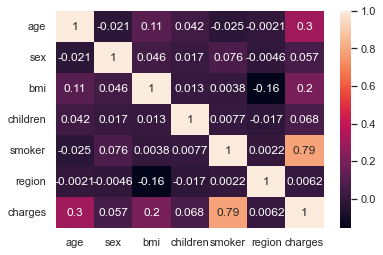

In [25]:
ax = sns.heatmap(data.corr(), annot=True)

### Splitting the Features and Target

In [26]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [27]:
X = data.drop(['charges'],axis=1)
y = data['charges']

In [28]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
lr = LinearRegression()
lr.fit(X_train,y_train)
svm = SVR()
svm.fit(X_train,y_train)
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)

GradientBoostingRegressor()

In [30]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

df1 = pd.DataFrame({'Actual':y_test,'Lr':y_pred1,
                  'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})

In [31]:
df1

,Actual,Lr,svm,rf,gr
764,9095.06825,8924.407244,9548.261584,11579.020440,11001.128629
887,5272.17580,7116.295018,9492.515425,5196.805350,5840.174656
890,29330.98315,36909.013521,9648.758701,28400.761557,28001.980112
1293,9301.89355,9507.874691,9555.044136,10352.582353,9745.291602
259,33750.29180,27013.350008,9420.421978,34644.656299,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.902852,47232.781776,45431.423211
575,12222.89830,11814.555568,9625.431547,12400.228873,12465.025294
535,6067.12675,7638.107736,9504.168517,6550.332572,6974.336525
543,63770.42801,40959.081722,9605.004594,46778.450972,47862.047791


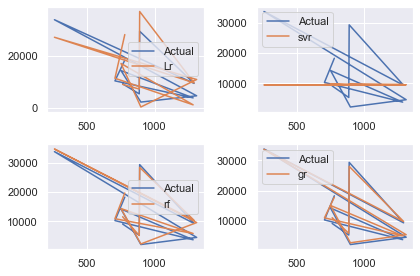

In [32]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['Lr'].iloc[0:11],label="Lr")
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label="svr")
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label="rf")
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gr'].iloc[0:11],label="gr")

plt.tight_layout()

plt.legend()

In [33]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [34]:
print(score1,score2,score3,score4)

0.7833463107364539 -0.07229762787861826 0.8651138921611239 0.877993618163719


In [35]:
s1 = metrics.mean_absolute_error(y_test,y_pred1)
s2 = metrics.mean_absolute_error(y_test,y_pred2)
s3 = metrics.mean_absolute_error(y_test,y_pred3)
s4 = metrics.mean_absolute_error(y_test,y_pred4)

In [36]:
print(s1,s2,s3,s4)

4186.508898366434 8592.428727899724 2489.7929769606976 2447.167158715136


In [37]:
data = {'age' : 40,
        'sex' : 1,
        'bmi' : 40.30,
        'children' : 4,
        'smoker' : 1,
        'region' : 2}

In [38]:
df = pd.DataFrame(data,index=[0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [39]:
new_pred = gr.predict(df)
print("Medical Insurance cost for New Customer is : ",new_pred[0])

Medical Insurance cost for New Customer is :  43931.13613048955


In [40]:
gr = GradientBoostingRegressor()
gr.fit(X,y)

GradientBoostingRegressor()

In [41]:
new_pred = gr.predict(df)
print("Medical Insurance cost for New Customer is : ",new_pred[0])

Medical Insurance cost for New Customer is :  42148.36188800322


In [42]:
gr = GradientBoostingRegressor()
gr.fit(X,y)

GradientBoostingRegressor()

In [43]:
import joblib

In [44]:
joblib.dump(gr,'model_joblib_gr')

['model_joblib_gr']

In [45]:
model = joblib.load('model_joblib_gr')

In [46]:
model.predict(df)

array([42148.361888])

In [47]:
# Insurance cost prediction GUI
from tkinter import *

In [48]:
import joblib

In [49]:
def show_entry():
    
    p1=float(e1.get())
    p2=float(e2.get())
    p3=float(e3.get())
    p4=float(e4.get())
    p5=float(e5.get())
    p6=float(e6.get())
    
    model = joblib.load('model_joblib_gr')
    result=model.predict([[p1,p2,p3,p4,p5,p6]])
    
    Label(master,text="Insurance Cost").grid(row=14)
    Label(master,text=result).grid(row=15)



master=Tk()
master.title("   Insurance Cost Prediction   ")
label=Label(master,text=' Insurance Cost Prediction ',bg="yellow", fg="blue").grid(row=0,columnspan=1)
Label(master,text = "").grid(row=1)
Label(master,text = "Enter your age",bg="lightblue", fg="blue").grid(row=2)
Label(master,text = "").grid(row=3)
Label(master,text = "Male or Female [1/0]",bg="lightblue", fg="blue").grid(row=4)
Label(master,text = "").grid(row=5)
Label(master,text = "Enter your BMI value",bg="lightblue", fg="blue").grid(row=6)
Label(master,text = "").grid(row=7)
Label(master,text = "Enter number of children",bg="lightblue", fg="blue").grid(row=8)
Label(master,text = "").grid(row=9)
Label(master,text = "Smoker Yes/No [1/0]",bg="lightblue", fg="blue").grid(row=10)
Label(master,text = "").grid(row=11)
Label(master,text = "Region [1-4]",bg="lightblue", fg="blue").grid(row=12)
Label(master,text = "").grid(row=13)

e1=Entry(master)
e2=Entry(master)
e3=Entry(master)
e4=Entry(master)
e5=Entry(master)
e6=Entry(master)

e1.grid(row=2,column=4)
e2.grid(row=4,column=4)
e3.grid(row=6,column=4)
e4.grid(row=8,column=4)
e5.grid(row=10,column=4)
e6.grid(row=12,column=4)

Button(master,text="Predict",bg="pink", fg="blue",command=show_entry).grid()


mainloop()
